In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]

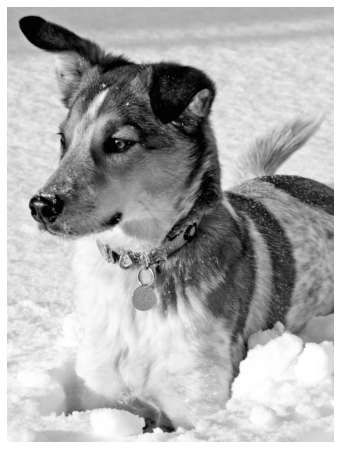

In [10]:
A = imread('dog.jpg')
X = np.mean(A,-1) # COvnerts RGB to grayscale
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [28]:
U,S,VT = np.linalg.svd(X,full_matrices=False)# economy svd (first m columns of u)
S = np.diag(S)
print("Shapes:  U:",U.shape," S:",S.shape," VT:",VT.shape)

Shapes:  U: (2000, 1500)  S: (1500, 1500)  VT: (1500, 1500)


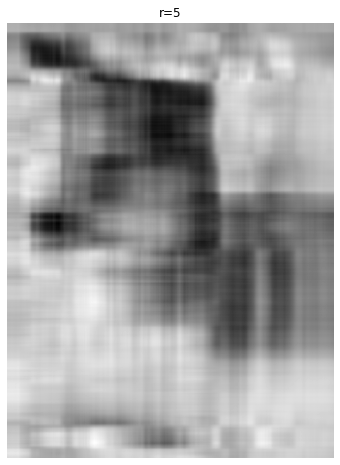

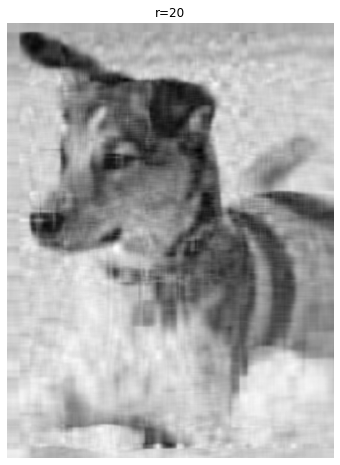

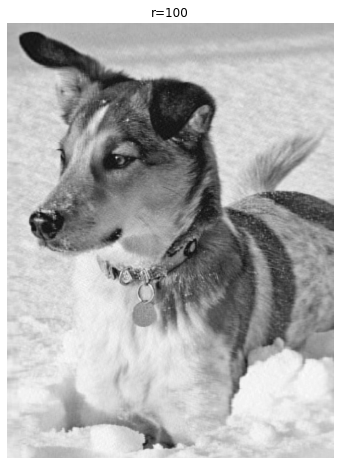

In [32]:
# RANK r APROXIMATIONS of X
j = 0
for r in (5,20,100):
    Xapprox = U[:,:r]@S[0:r,:r]@VT[:r,:]
    plt.figure(j+1)
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.title('r=' + str(r))
    plt.axis('off')
    plt.show()

Keep in mind Xapprox has the same size as X, by compressing we mean: we get a lower rank sum to interpet the original photo.

We can see that r=5 is not really perseving all the features, but r=100 deffenatelly is, but in order to have a solid conclusion lets analyze the decomposition

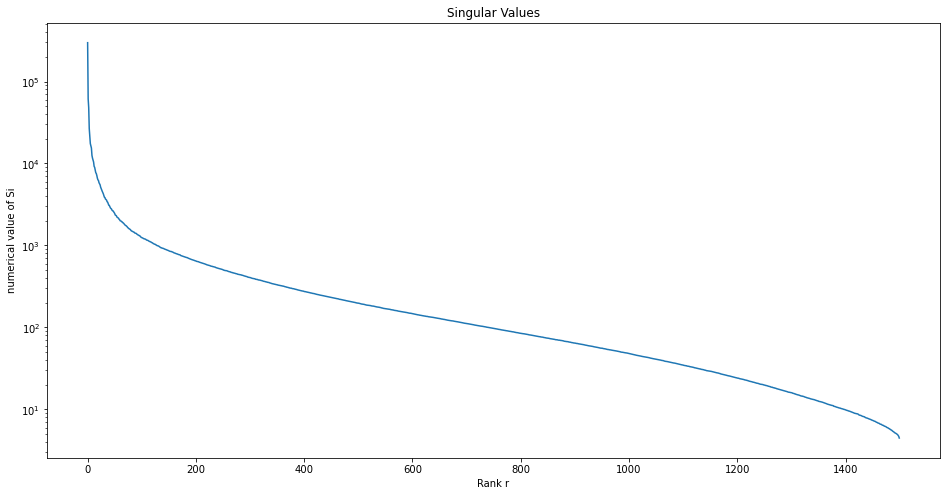

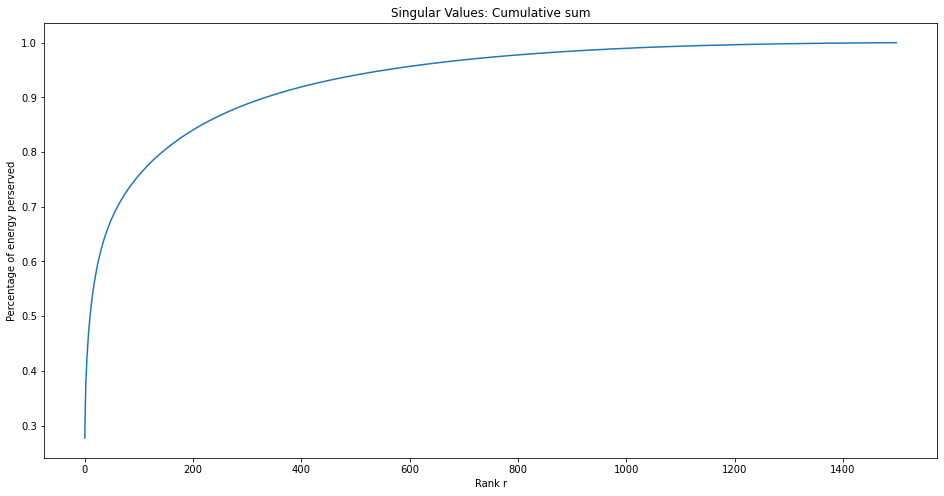

In [78]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.xlabel('Rank r')
plt.ylabel('numerical value of Si')
plt.show()


# Fraction of enery capture
plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative sum')
plt.xlabel('Rank r')
plt.ylabel('Percentage of energy perserved')
plt.show()

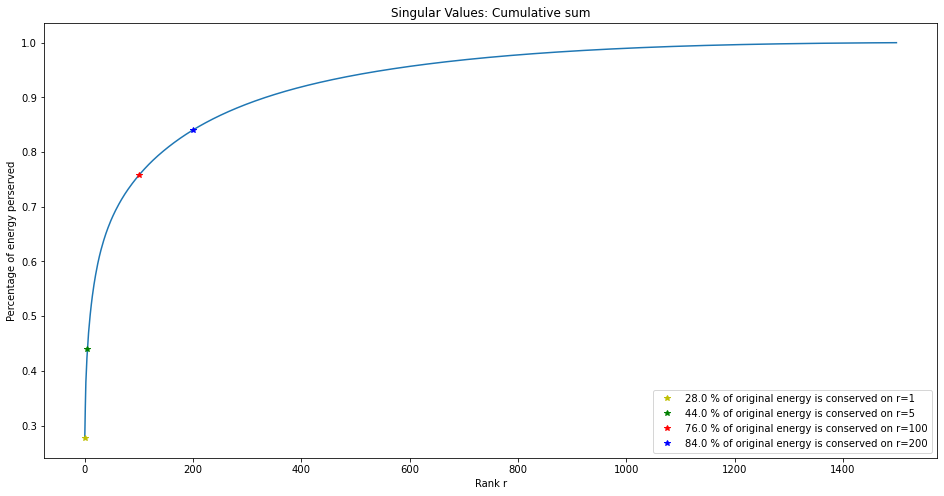

In [89]:
Energy = np.cumsum(np.diag(S))/np.sum(np.diag(S))

plt.figure(3)
plt.plot(Energy)
plt.plot(1,Energy[0],"y*",label="{} % of original energy is conserved on r=1".format(np.round(Energy[0]*100)))
plt.plot(5,Energy[5],"g*",label="{} % of original energy is conserved on r=5".format(np.round(Energy[5]*100)))
plt.plot(100,Energy[100],"r*",label="{} % of original energy is conserved on r=100".format(np.round(Energy[100]*100)))
plt.plot(200,Energy[200],"b*",label="{} % of original energy is conserved on r=200".format(np.round(Energy[200]*100)))
plt.title('Singular Values: Cumulative sum')
plt.xlabel('Rank r')
plt.ylabel('Percentage of energy perserved')
plt.legend(loc="best")
plt.show()

Thoughts: We see that even a Rank 1 Matrix captures  28% percent of the energy, we can appricaite that most of the energy is captured by lower ranks, while high ranks 
contribute almost no energy

Bibliography <br> [
Steve Brunton, University of Washingon](https://www.youtube.com/watch?v=H7qMMudo3e8&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=6)